<a href="https://colab.research.google.com/github/geonleea01702148/RETO/blob/main/DS_C3_SC1_Geon_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 새 섹션

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


Columnas en Happiness_report.csv: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
Columnas en Metadata.csv: ['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName']


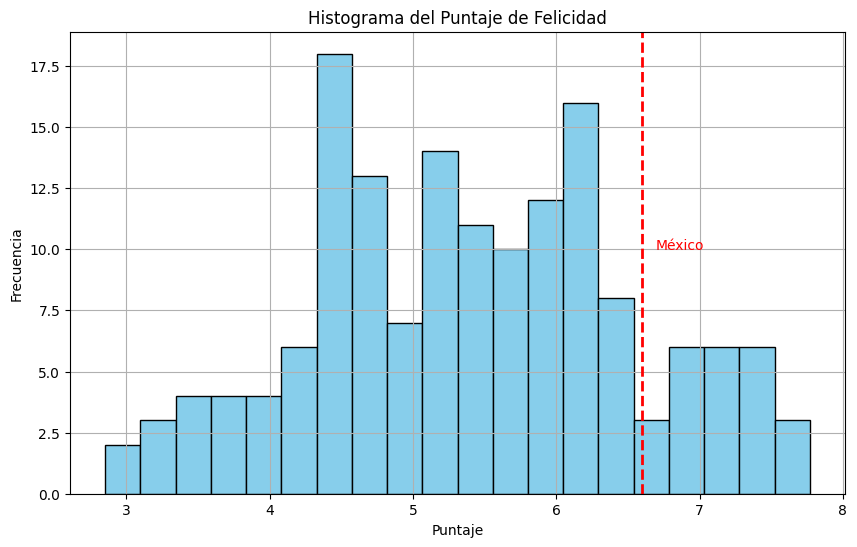

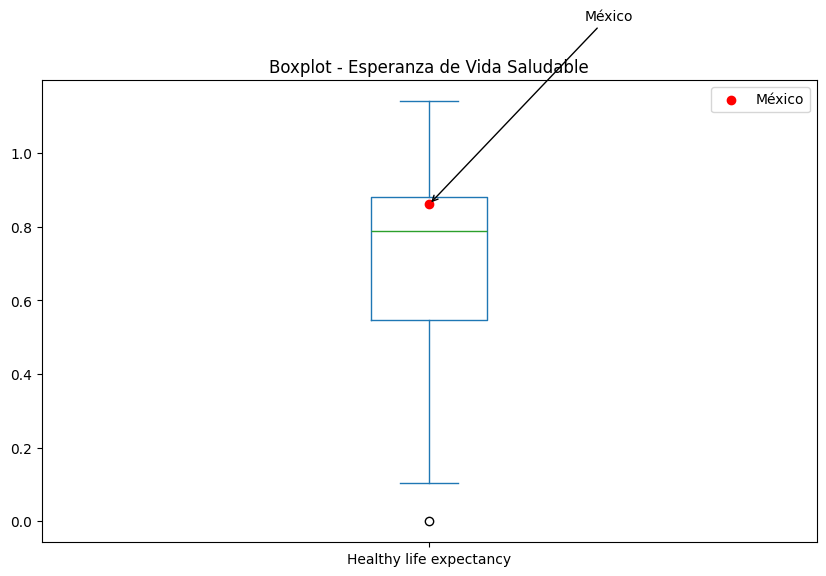

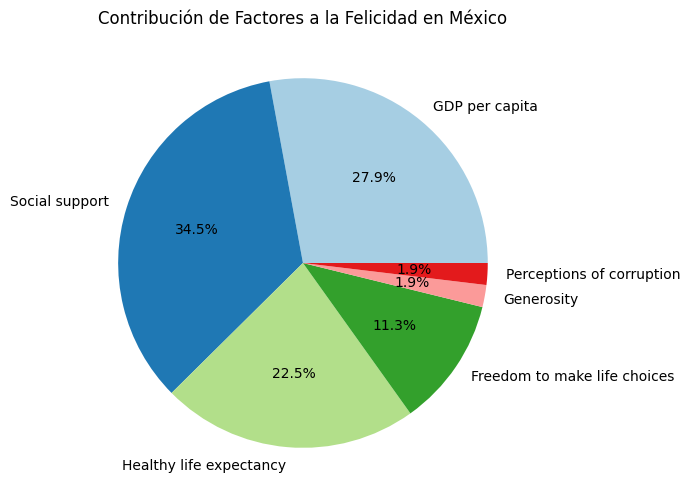

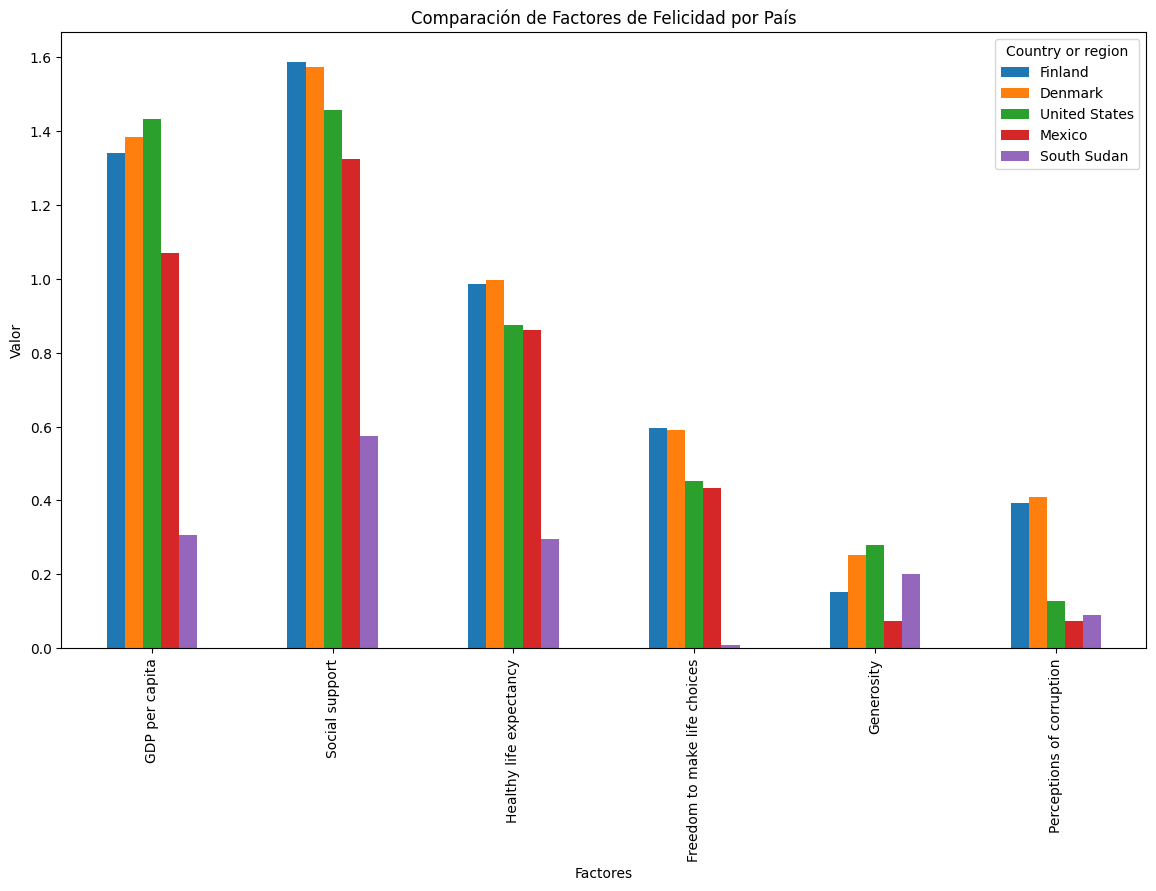

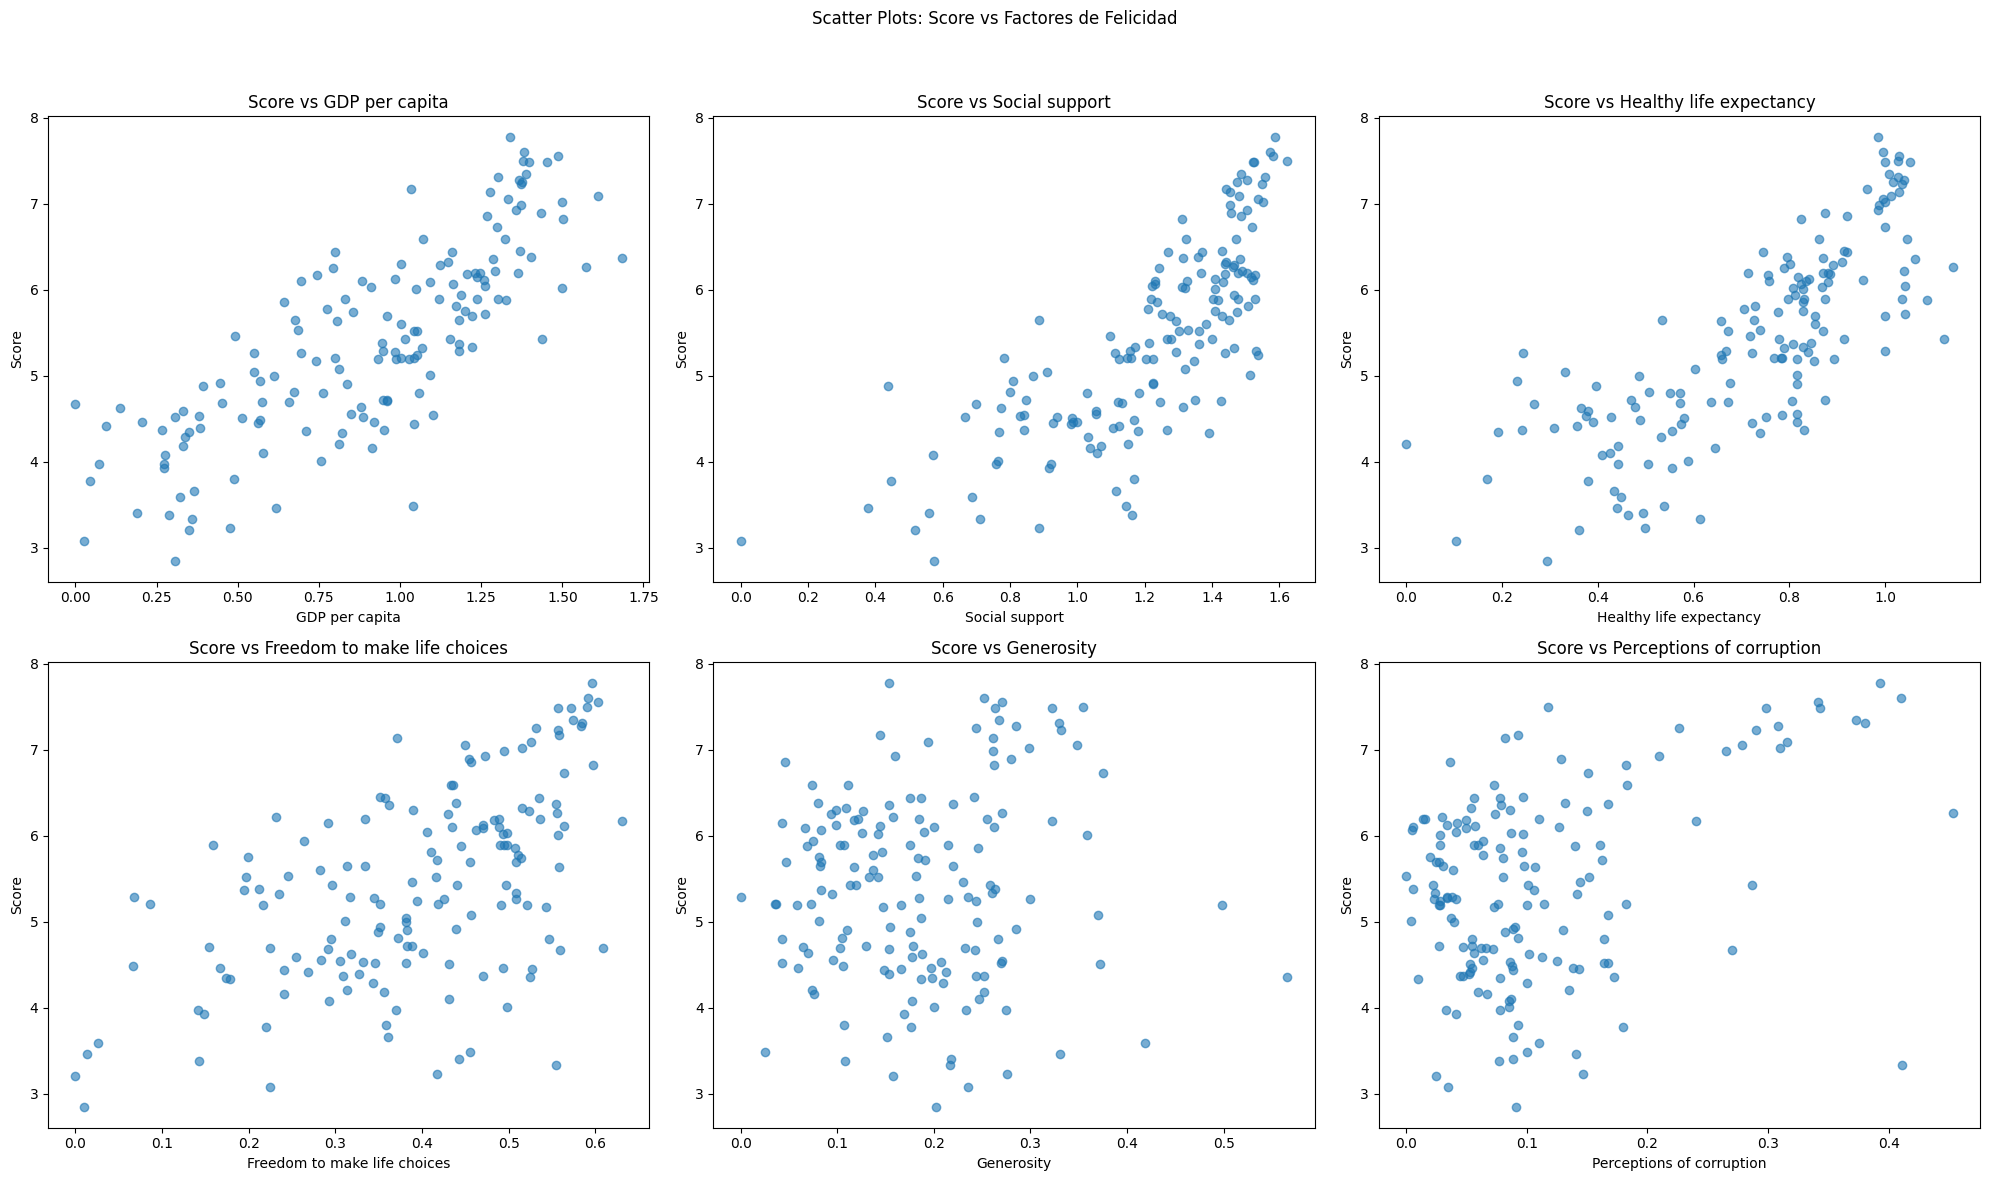

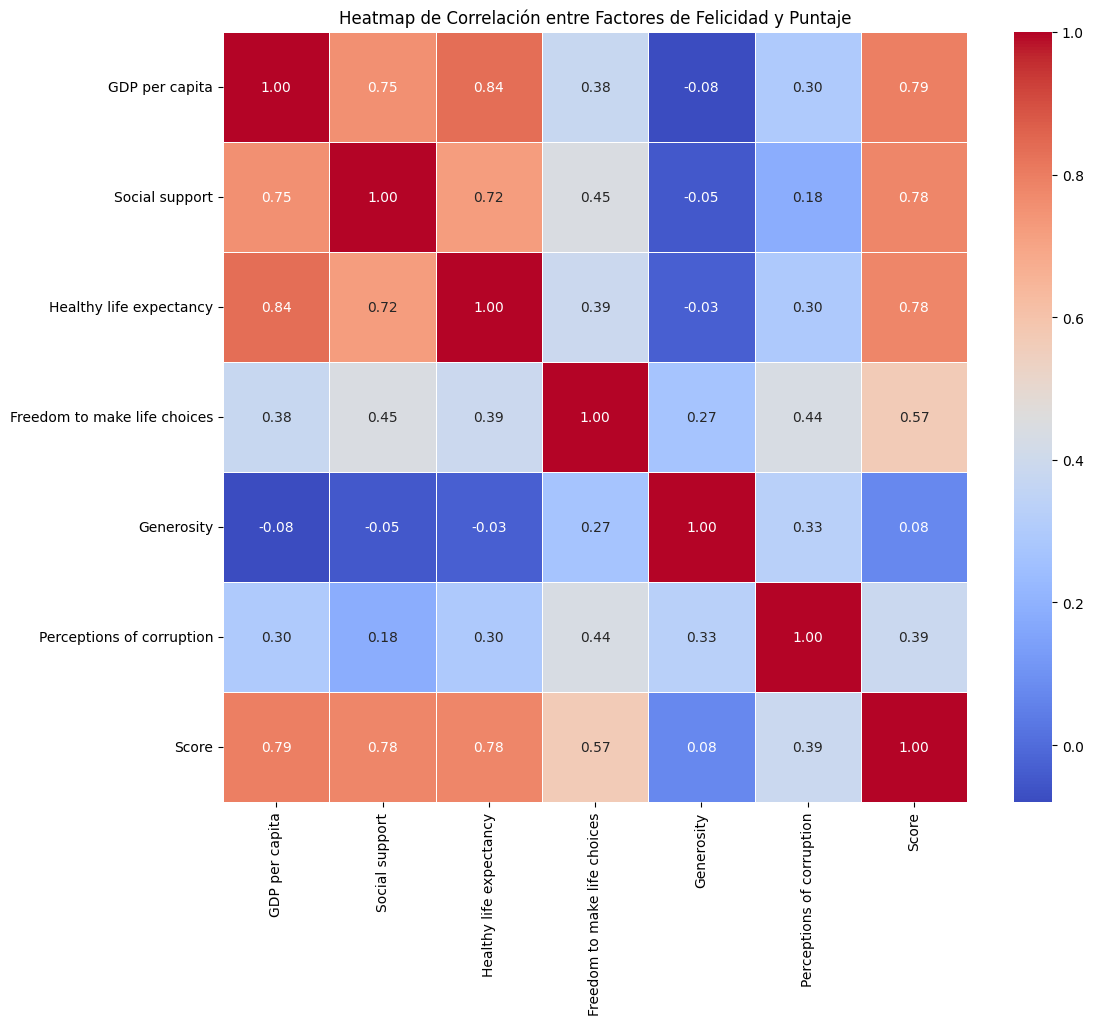

Columnas en Metadata.csv: ['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName']
La columna clave 'Regional indicator' no está presente en los datos de metadata. Verifica los archivos.


In [ ]:
# Proyecto de análisis del Informe Mundial sobre la Felicidad 2019
# Autor: [Geon Lee]
# Descargar archivos necesarios: Happiness_report.csv y Metadata.csv desde Google Drive antes de ejecutar

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos desde Google Drive
happiness = pd.read_csv('/content/drive/My Drive/Happiness_report.csv')
metadata = pd.read_csv('/content/drive/My Drive/Metadata.csv')

# Ver las primeras filas del dataframe para entender la estructura
display(happiness.head())
display(metadata.head())

# Mostrar las columnas disponibles en ambos dataframes
print("Columnas en Happiness_report.csv:", happiness.columns.tolist())
print("Columnas en Metadata.csv:", metadata.columns.tolist())

# Crear un dataframe para México y establecer la columna como índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Obtener un histograma del puntaje (score)
plt.figure(figsize=(10, 6))
happiness['Score'].hist(bins=20, color='skyblue', edgecolor='black')
plt.axvline(mexico['Score'].values[0], color='red', linestyle='dashed', linewidth=2)
plt.text(mexico['Score'].values[0] + 0.1, 10, 'México', color='red')
plt.title('Histograma del Puntaje de Felicidad')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

# Construir un boxplot para la esperanza de vida
plt.figure(figsize=(10, 6))
happiness['Healthy life expectancy'].plot(kind='box')
plt.scatter(1, mexico['Healthy life expectancy'].values[0], color='red', label='México')
plt.annotate('México', xy=(1, mexico['Healthy life expectancy'].values[0]), xytext=(1.2, mexico['Healthy life expectancy'].values[0] + 0.5), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.title('Boxplot - Esperanza de Vida Saludable')
plt.legend()
plt.show()

# Crear una gráfica circular para México
plt.figure(figsize=(10, 6))
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
valores = mexico[factores].values[0]
plt.pie(valores, labels=factores, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Contribución de Factores a la Felicidad en México')
plt.show()

# Filtrar y seleccionar 5 países
paises_seleccionados = happiness.loc[happiness['Country or region'].isin(['Finland', 'South Sudan', 'Mexico', 'Denmark', 'United States'])]
paises_seleccionados.set_index('Country or region', inplace=True)

# Visualizar los factores en una gráfica de barras
paises_seleccionados[factores].T.plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Factores de Felicidad por País')
plt.xlabel('Factores')
plt.ylabel('Valor')
plt.show()

# Crear una matriz de subgráficas de scatter plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Scatter Plots: Score vs Factores de Felicidad')
for i, factor in enumerate(factores):
    ax = axes[i // 3, i % 3]
    ax.scatter(happiness[factor], happiness['Score'], alpha=0.6)
    ax.set_title(f'Score vs {factor}')
    ax.set_xlabel(factor)
    ax.set_ylabel('Score')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Crear un heatmap de correlación
plt.figure(figsize=(12, 10))
correlation = happiness[factores + ['Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlación entre Factores de Felicidad y Puntaje')
plt.show()

# Inspeccionar las columnas de metadata para encontrar la columna común
print("Columnas en Metadata.csv:", metadata.columns.tolist())

# Combinar con el dataframe metadata usando una columna clave apropiada
# Verificar si 'Regional indicator' está presente en las columnas de metadata
clave_comun = 'Country or region' if 'Country or region' in metadata.columns else 'Regional indicator'

# Realizar la fusión (merge) si la columna clave existe
if clave_comun in metadata.columns:
    happiness_metadata = happiness.merge(metadata, left_on='Country or region', right_on=clave_comun)

    # Verificar si 'Regional indicator' está presente en los datos combinados
    if 'Regional indicator' in happiness_metadata.columns:
        felicidad_region = happiness_metadata.groupby('Regional indicator')['Score'].mean()

        # Graficar la felicidad promedio por región
        plt.figure(figsize=(12, 8))
        felicidad_region.plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title('Felicidad Promedio por Región')
        plt.xlabel('Región')
        plt.ylabel('Puntaje Promedio de Felicidad')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("La columna 'Regional indicator' no está presente en los datos combinados. Verifica los archivos.")
else:
    print(f"La columna clave '{clave_comun}' no está presente en los datos de metadata. Verifica los archivos.")

# Fin del script



